PERCEPTRON

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [7]:
class Perceptron:
    def __init__(self, learning_rate=0.1, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            errors = 0
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = 1 if linear_output > 0 else 0

                update = self.lr * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

                errors += int(update != 0)

            if errors == 0:  # converged
                break

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = np.where(linear_output > 0, 1, 0)
        return y_predicted

In [8]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Perceptron_dataset.csv')
df.head()

,Feature1,Feature2,Target
0,2.0,3.0,1
1,1.0,1.0,0
2,4.0,5.0,1
3,1.5,0.5,0
4,3.5,2.0,1


In [9]:
# Use only first two features for 2D visualization and binary classification example
X = df[['Feature1', 'Feature2']].values
y = df['Target'].values

y_binary = (y == 0).astype(int)

In [10]:
# Train perceptron
clf = Perceptron(learning_rate=0.01, n_iters=1000)
clf.fit(X, y_binary)

In [11]:
# Prediction
predictions = clf.predict(X)
accuracy = np.mean(predictions == y_binary)
print(f'Perceptron accuracy (binary, class 0 vs rest): {accuracy*100:.2f}%')


Perceptron accuracy (binary, class 0 vs rest): 100.00%


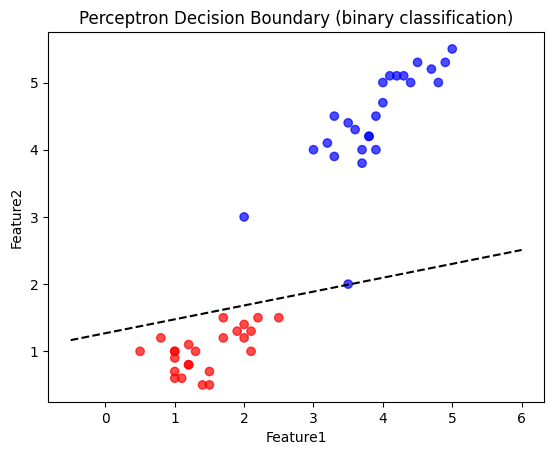

In [12]:
# Plot data points and decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y_binary, cmap='bwr', alpha=0.7)
x0_vals = np.array([X[:,0].min()-1, X[:,0].max()+1])
x1_vals = -(clf.weights[0]*x0_vals + clf.bias) / clf.weights[1]
plt.plot(x0_vals, x1_vals, 'k--')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('Perceptron Decision Boundary (binary classification)')
plt.show()

In [13]:
# Testing new inputs
new_inputs = np.array([
    [3.0, 3.5],
    [1.2, 0.7],
    [4.5, 4.9]
])

# Predict classes for new inputs
predictions = clf.predict(new_inputs)

for i, features in enumerate(new_inputs):
    print(f'Input features: {features} => Predicted class: {predictions[i]}')


Input features: [3.  3.5] => Predicted class: 0
Input features: [1.2 0.7] => Predicted class: 1
Input features: [4.5 4.9] => Predicted class: 0
